In [66]:

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz


In [67]:
#scikit-learn.svm下有SVR（用于回归任务）和SVC（用于分类任务）
from sklearn import svm
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.3)

In [68]:
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    print(xx.ravel().shape)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

(303696L,)


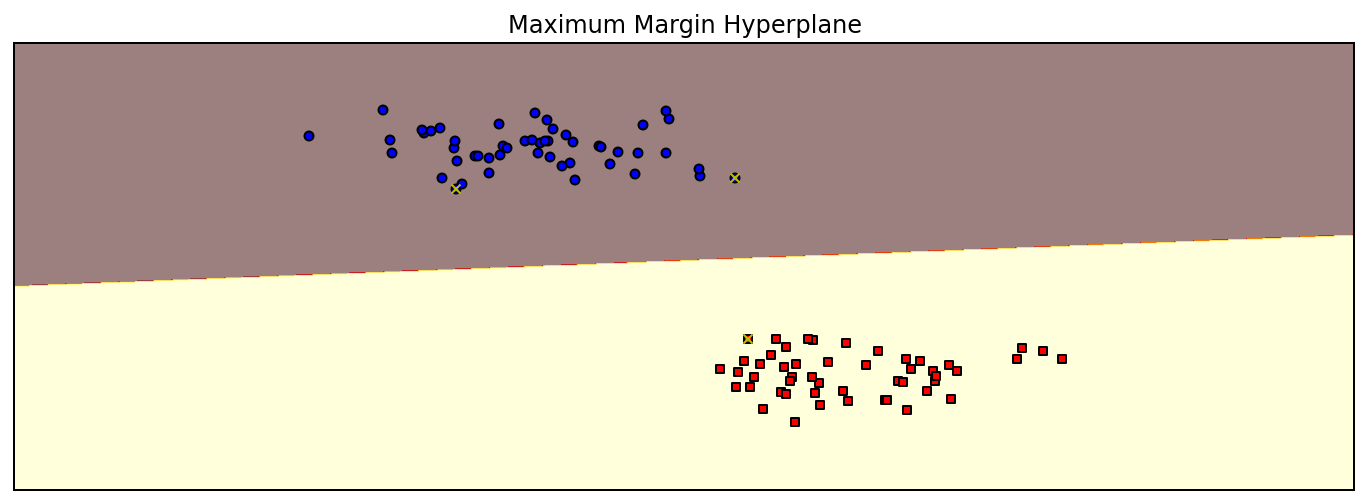

In [69]:
clf = svm.SVC(C=1.0, kernel = 'linear')
clf.fit(x, y)
plt.figure(figsize=(12,4), dpi=144)
plot_hyperplane(clf, x, y, h=0.01, 
               title='Maximum Margin Hyperplane')

In [70]:
print x.shape, y.shape

(100L, 2L) (100L,)


In [71]:
np.meshgrid(np.arange(1, 10,1),
                         np.arange(11, 15, 1))

[array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[11, 11, 11, 11, 11, 11, 11, 11, 11],
        [12, 12, 12, 12, 12, 12, 12, 12, 12],
        [13, 13, 13, 13, 13, 13, 13, 13, 13],
        [14, 14, 14, 14, 14, 14, 14, 14, 14]])]

In [72]:
##

(170560L,)
(170560L,)
(170560L,)
(170560L,)


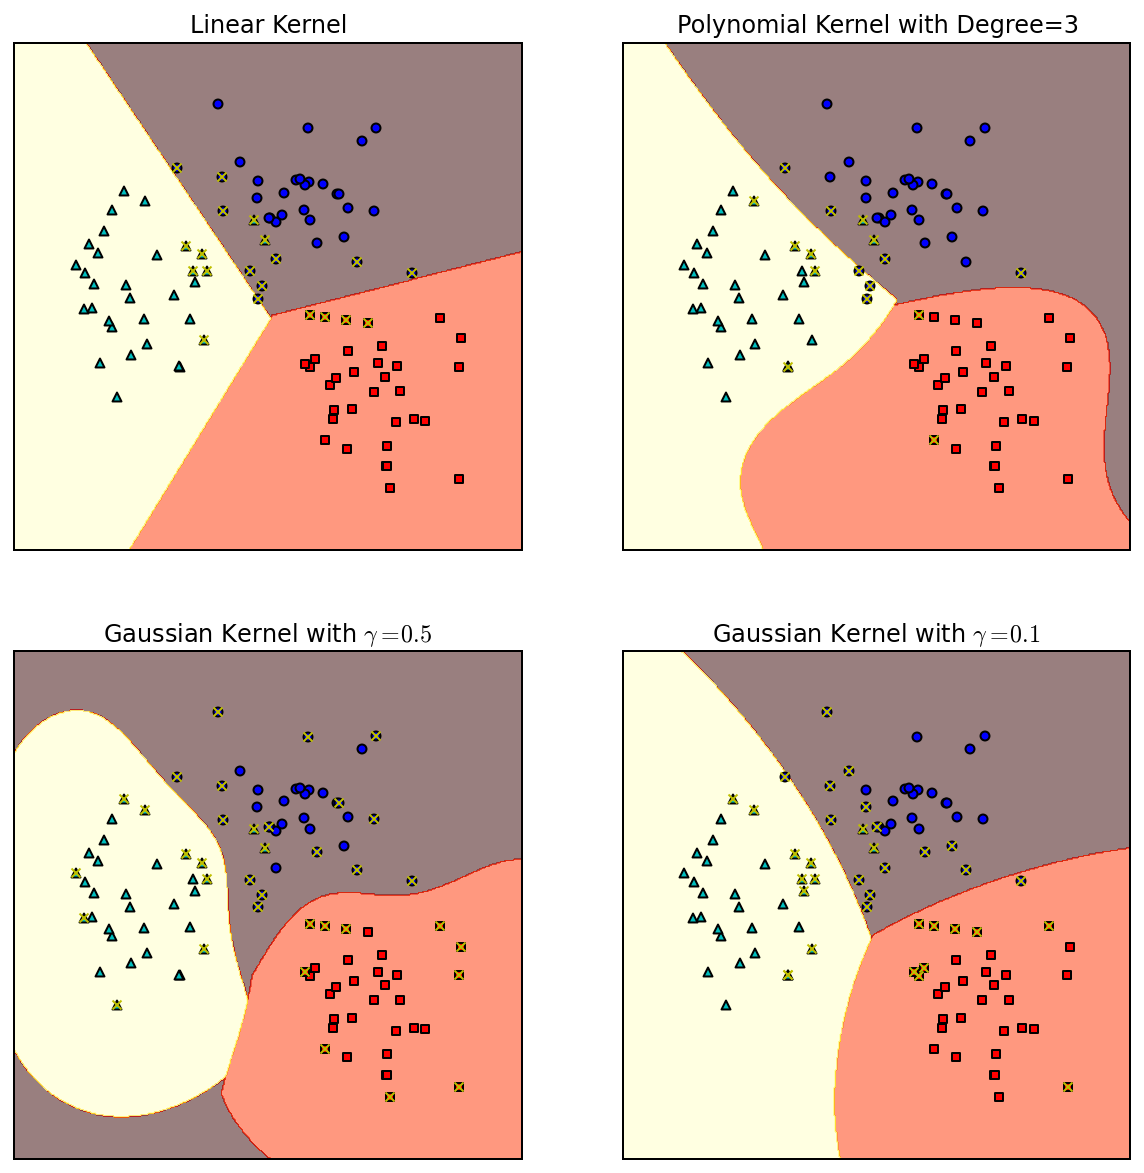

In [73]:
x, y = make_blobs(n_samples=100, centers=3, 
                 random_state=0, cluster_std=0.8)
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(10,10), dpi=144)
clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = [
    'Linear Kernel', 
    'Polynomial Kernel with Degree=3',
    'Gaussian Kernel with $\gamma=0.5$',
    'Gaussian Kernel with $\gamma=0.1$'
]

for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(x, y)
    plt.subplot(2,2,i+1)
    plot_hyperplane(clf, x, y, title=titles[i])

In [74]:
##乳腺癌检测
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

print('data shape: {0}, no positive: {1}, no. negative: {2}'.format(
        x.shape, y[y==1].shape[0], y[y==0].shape[0]))

data shape: (569L, 30L), no positive: 357, no. negative: 212


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [85]:
#use gaussian kernel to have a look

#clf = svm.SVC(C=1.0, kernel='rbf', gamma=0.0001)
clf = svm.SVC(C=1.0, kernel='poly', degree=2)
#clf = svm.SVC(C=1.0, kernel='poly', degree=1)
clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print('train score: {0}; test score:{1}'.format(train_score, test_score))

train score: 0.971428571429; test score:0.956140350877


In [86]:
clf = svm.SVC(C=1.0, kernel='poly', degree=1)
clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print('train score: {0}; test score:{1}'.format(train_score, test_score))

train score: 0.958241758242; test score:0.964912280702


In [77]:
print x_train.shape, y_train.shape


(455L, 30L) (455L,)


In [84]:
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 0.0003, 300)

param_grid = {'gamma': gammas}

clf = GridSearchCV(svm.SVC(), param_grid, cv=5)
clf.fit(x_train, y_train)
print('best param: {0} \n best score: {1}'.format(clf.best_params_, clf.best_score_))


best param: {'gamma': 0.00010535117056856185} 
 best score: 0.938461538462
